# IBM Ponder This - June 2020 - Challenge

by Walter Sebastian Gisler

## Problem Description

This is the 278th Ponder This monthly challenge. If you sum the divisors of 278 (excluding itself), you get 142, which is the number of challenges I wrote for IBM's puzzle corner. There are 138 natural numbers that are smaller than 278 and relatively prime to it. 138 is also the number of challenges our best solver to date, Daniel Bitin, has correctly solved.

Your challenge is to find a number whose sum of divisors (excluding itself) is 12,142,680,281,284,711,468,101,282,998,309,016,699,980,172 and exactly 3,031,634,148,236,289,733,373,855,928,919,180,891,127,808 out of the natural numbers that are smaller than it are relatively prime to it.

Source: https://www.research.ibm.com/haifa/ponderthis/challenges/June2020.html

## Before I even start...

This was a really tough one for me. But also extremely exciting and it gave me an opportunity to read up about some topics in number theory. I started with a dumb approach, realized it wouldn't work, made it more efficient (to an extent that it was blazing fast for smaller, but still large numbers) just to realize that the number of possibilities I had to check was still way to big. I probably improved the performance of the initial approach by $10^6$ over a couple of days, if not even more. Not an optimization problem, but it has lot in common with difficult constrained problems in reality: too hard to enumerate all possible candidates so there needs to be smart reasoning to ignore areas of the solution space that can be ignored. Given that some people solved this in just 2 or 3 days after the problem was published, I assume that there are still more ways to speed this up that I didn't see or that there is an approach that is a lot smarter than mine.

## Towards a solution

Let's first start by importing some packages and methods that might come in handy:

In [1]:
from functools import reduce
from sympy import factorint
from sympy.ntheory import totient
from math import sqrt
from random import shuffle
from math import log, gcd
from time import time
from sympy.ntheory import isprime as is_prime
from sympy import divisors as get_divisors

After that, I defined methods to get the factors and the divisors of a number. As you can see, I was optimistic, that this would not be too hard and didn't want to use the more efficient methods that sympy or sage offers. I'll post them here, but later on replaced them by the sympy methods:

In [2]:
def get_factors(n):    
    return list(factorint(n).items())

# def get_divisors(n):
#     factors = get_factors(n)
#     nfactors = len(factors)
#     f = [0] * nfactors
#     while True:
#         yield reduce(lambda x, y: x*y, [factors[x][0]**f[x] for x in range(nfactors)], 1)
#         i = 0
#         while True:
#             f[i] += 1
#             if f[i] <= factors[i][1]:
#                 break
#             f[i] = 0
#             i += 1
#             if i >= nfactors:
#                 return

At the very beginning, I was just plotting the values of the divisors (excluding itself) for different numbers and also the number of smaller numbers that are relatively prime to it for different numbers to see if there was any pattern that I could make out:

1
2
2
4
2
6
4
6
4
10
4
12
6
8
8
16
6
18


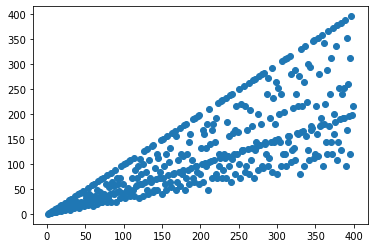

In [3]:
from matplotlib.pyplot import scatter

x = []
y = []

for i in range(2,400):
    num_coprimes = 0
    for j in range(1, i):
        if gcd(j,i) == 1:
            num_coprimes += 1
    x.append(i)
    y.append(num_coprimes)
    if i < 20:
        print(num_coprimes)
    
plot = scatter(x, y)

Great! These numbers are on lines, so I just have to identify the lines and search the areas around them. Well, not so easy, it turns out, but that was my initial thought.

By now, I know that it is a good idea to look up number sequences in the OEIS, and that's just what I did: [OEIS; Euler Totient Function](https://oeis.org/search?q=1+2+2+4+2+6+4+6+4+10+4+12+6+8+8+16+6+18&sort=&language=english&go=Search)

Great, after that I knew which direction to look at and what papers to read and I also new, that what I had just implemented by hand had been done more efficiently by others and that there was a formula for it.

I did a similar search for the sum of divisors excluding the number itself, and found that the sum of divisors of a number is called *divisor sigma* and that the sum of divisors excluding itself is called *sum of proper divisors* or *sum of aliquot parts*.

### Calculating the Euler-Phi

Turns out, if you manage to factorize a number $N$, there is a simple formula to calculate the Euler Phi:

$N = p_1^{a_1} p_2^{a_2}  p_3^{a_3}  p_4^{a_4} \dots p_k^{a_k} $ 

The Euler Phi can then be calculated as follows:

$\phi(N) = p_1^{a_{1}-1}(p_{1}-1) p_2^{a_2-1}(p_2-1) p_3^{a_3-1}(p_3-1) p_4^{a_4-1}(p_4-1) \dots p_1^{a_k-1}(p_1-1) $

That means, if we have the factors of a number, we can calculate it's totient function immediately. Factoring numbers in the range of the value that we were searching for is not a problem, so getting there totient function is absolutely possible.

### Applying this to the problem

Here, we were given the value of the Euler Phi, namely 3031634148236289733373855928919180891127808 and we had to find a matching number that would yield that Phi.

Applying the above, we can conclude, that if we manage to write the number as it's divisors, and each divisor can be expressed through a prime number and a factor as follows $p_1^{a_k-1}(p_1-1)$, we are able to reconstruct the initial $N$.

Example:

Let's assume we are given a $ \phi = 108 $

This can be written as $18 * 6$, which can be expressed using prime factors as follows; $ 3^{3-1}(3-1) * 7^{1-1}(7-1)$

If we have this formulation, we can conclude that the number that yields an Euler Phi of 108 is equal to $3^3*7 = 189$

There are often different solutions to this, for example, 108 can also be written as follows:

$108 = 2^{1-1}(2-1) * 109^{1-1}(109-1) = 1 * 108$ and hence, $2*109 = 218$ is a second solution to the inverse Euler Phi problem.

Wolfram Alpha was incredibly helpful as I tried to reconstruct how this works. Wolfram Alpha can solve inverse Euler Phi problem for some smaller numbers, for example:

[Inverse Euler Phi of 108](https://www.wolframalpha.com/input/?i=eulerphi%28x%29+%3D+108)

Basically, it is clear how to find the inverse Euler Phi for any number $N$:

1. Find all of the divisors of $N$
2. For each divisor $D$, find all possible representations using prime factors $p^a$ such that $ D = p^{a-1}(p-1) $
3. Then, find all possible combinations of divisors (that can be expressed using prime factors) that yield $N$

Finding the *prime factor representation*, which I will call PR-Form of a number is relatively easy once you know it's factors. You can simply apply a logarithm:

In [4]:
def get_p_r_form(n):
    results = []
    factors = get_factors(n)
    for p,m in factors:
        rm1 = log(n/(p-1), p)
        r = rm1+1
        if int(r) == r:
            results += [(int(p),int(r))]
    if n > 1 and is_prime(n+1):
        results += [(n+1,1)]
    return [(0,0)] if len(results) == 0 else results

We can test this for 18, which was one of the divisors of 108:

In [5]:
get_p_r_form(18)

[(3, 3), (19, 1)]

This works great already but if we have to calculate the PR-Form for many numbers, espescially large ones, we are repeating a lot of the same calculations. I therefore decided to add a cached version of the method:

In [6]:
prform_cache = dict()

def get_p_r_form_cached(n):
    if n in prform_cache:
        return prform_cache[n]
    results = []
    factors = get_factors(n)
    for p,m in factors:
        rm1 = log(n/(p-1), p)
        r = rm1+1
        if int(r) == r:
            results += [(int(p),int(r))]
    if n > 1 and is_prime(n+1):
        results += [(n+1,1)]
    results = [(0,0)] if len(results) == 0 else results
    prform_cache[n] = results
    return results

This now allows us to define a method to find the inverse Euler Phi of a number:

In [7]:
def inverse_eulerphi(phi, prs = dict()):
    divisors = get_divisors(phi)
    result = set()
    if phi == 1:
        res = set()
        if 1 not in prs.keys():
            res.add(1)
        if 2 not in prs.keys():
            res.add(2)
        return res
    for div in divisors:
        prforms = get_p_r_form(div)
        for p,r in prforms:
            if p != 0 and p not in prs.keys():
                remainder = int(phi//div)
                new_prs = {**prs, **{p:r}}
                phis = inverse_eulerphi(remainder, new_prs)
                result = result.union({p**r*phi for phi in phis})
    return result

Let's test with 108:

In [8]:
inverse_eulerphi(108)

{109, 133, 171, 189, 218, 266, 324, 342, 378}

This works, and returns the same result as Wolfram Alpha. However, it quickly turned out that this would not be anywhere near fast enough for what we were going to do, I therefore defined a faster method, that uses caching, and passes the possible next divisors further when it is calling itself:

In [9]:
# cached prform
# predetermined divisors
def faster_inverse_eulerphi(phi, prs = dict(), original_n = 0, target_divisor_sum = 0, divisor_candidates = []):
    if phi != 1 and phi%2 == 1:
        return set()
    if phi == 1:
        res = set()
        if 1 not in prs.keys():
            res.add(1)
        if 2 not in prs.keys():
            res.add(2)
        return res
    divisors = divisor_candidates if divisor_candidates else [int(d) for d in get_divisors(phi)]
    shuffle(divisors)
    result = set()
    for div in divisors:
        if div >= sqrt(phi): # Careful with this; it speeds up the progress enormously, but I am not 100% sure if it generates all solutions
            prforms = get_p_r_form_cached(div)
            prspart = 1
            for k,v in prs.items():
                prspart*k**v
            for p,r in prforms:
                if p != 0 and p not in prs.keys():
                    remainder = int(phi//div)
                    new_divisors = [d for d in divisors if (d != div or len(prforms) > 1) and remainder%d == 0]
                    new_prs = {**prs, **{p:r}}
                    phis = faster_inverse_eulerphi(remainder, new_prs, original_n, target_divisor_sum, new_divisors)
                    result = result.union({p**r*phi for phi in phis})
    return result

We can test this with a substantially larger number. Let's also time it:

In [10]:
n = 26272999389987213213710000

st = time()
res = inverse_eulerphi(n)
print(res)
print('Took %f seconds'%(time()-st))

st = time()
res = faster_inverse_eulerphi(n)
print(res)
print('Took %f seconds'%(time()-st))

{32880439272373615582214725, 86804359679066345137046874, 52546774366672285828819084, 65760878544747231164429450, 39410080775004214371614313, 43402179839533172568523437, 57869573119377563424697916, 78820161550008428743228626}
Took 27.284090 seconds
{32880439272373615582214725, 86804359679066345137046874, 65760878544747231164429450, 39410080775004214371614313, 78820161550008428743228626, 43402179839533172568523437, 57869573119377563424697916, 52546774366672285828819084}
Took 0.260899 seconds


As expected, the two methods both return the same solutions, which can also be verified using Wolfram Alpha, but the second method is about 100 times faster than the first one. Unfortunately, the second method is still far from capable of solving the problem using the number suggested by IBM.

There are some inefficiencies in always recalculating the divisors and the PR-Form. It turns out, we can prepare all of this ahead of time and also prepare the factors that make up the Euler Phi, the number itself and even the divisor sum:

In [11]:
a = get_divisors(n)
prfs = []
for i in a:
    prf = get_p_r_form_cached(i)
    if len(prf) > 1 or prf[0][0] != 0:
        prfs += prf

def divisor_sum_factor(p, r):
    dsum = 0
    for i in range(0, r+1):
        dsum += p**i
    return dsum

new_prfs = [] # format: (p, r, numberfactor, eulerphifactor, divisorsumfactor)
for prf in prfs:
    new_prfs.append((prf[0], prf[1], prf[0]**prf[1], prf[0]**prf[1]-prf[0]**(prf[1]-1), divisor_sum_factor(prf[0], prf[1])))

new_prfs = [(2,1,2,1,3)]+sorted(new_prfs, key = lambda prf: prf[3])

print(new_prfs)

[(2, 1, 2, 1, 3), (2, 2, 4, 2, 7), (3, 1, 3, 2, 4), (2, 3, 8, 4, 15), (5, 1, 5, 4, 6), (2, 4, 16, 8, 31), (11, 1, 11, 10, 12), (2, 5, 32, 16, 63), (17, 1, 17, 16, 18), (5, 2, 25, 20, 31), (41, 1, 41, 40, 42), (5, 3, 125, 100, 156), (101, 1, 101, 100, 102), (251, 1, 251, 250, 252), (401, 1, 401, 400, 402), (5, 4, 625, 500, 781), (839, 1, 839, 838, 840), (5, 5, 3125, 2500, 3906), (2711, 1, 2711, 2710, 2712), (4337, 1, 4337, 4336, 4338), (33521, 1, 33521, 33520, 33522), (67751, 1, 67751, 67750, 67752), (108401, 1, 108401, 108400, 108402), (2270981, 1, 2270981, 2270980, 2270982), (165971501, 1, 165971501, 165971500, 165971502), (567745001, 1, 567745001, 567745000, 567745002), (663886001, 1, 663886001, 663886000, 663886002), (1390841171, 1, 1390841171, 1390841170, 1390841172), (44978276501, 1, 44978276501, 44978276500, 44978276502), (55633646801, 1, 55633646801, 55633646800, 55633646802), (112445691251, 1, 112445691251, 112445691250, 112445691252), (139084117001, 1, 139084117001, 1390841170

The list above contains all divisors of $n$, already in their PR-Form, the factor of the number, the eulerphi factor and the divisor sum factor. Using this prepared list, we can now define a really fast method to calculate all Euler Phi:

In [12]:
def complete_number(current_prf_seq, remaining_prf, target_eulerphi):
    current_eulerphi = 1
    current_factors = []
    for item in current_prf_seq:
        current_eulerphi*=item[3]
        current_factors.append(item[0])
    for i,item in enumerate(remaining_prf):
        if item[0] not in current_factors:
            new_eulerphi = item[3]*current_eulerphi
            if new_eulerphi == target_eulerphi:
                number = item[2]
                factors = '|'.join([str(j[0])+'^'+str(j[1]) for j in [item]+current_prf_seq])
                for cpf in current_prf_seq:
                    number*=cpf[2]
                print(str(number)+','+factors)
            if new_eulerphi < target_eulerphi and target_eulerphi%current_eulerphi == 0:
                complete_number(current_prf_seq + [item], remaining_prf[i+1:], target_eulerphi)
            else:
                break

Let's test this and time it again:

In [13]:
st = time()
complete_number([], new_prfs, n)
print('Took %f seconds'%(time()-st))

86804359679066345137046874,1567601395583962602251^1|2^1|3^1|11^1|839^1
78820161550008428743228626,193896674464850282021^1|2^1|3^1|67751^1
65760878544747231164429450,1567601395583962602251^1|2^1|5^2|839^1
57869573119377563424697916,1567601395583962602251^1|2^2|11^1|839^1
52546774366672285828819084,193896674464850282021^1|2^2|67751^1
43402179839533172568523437,1567601395583962602251^1|3^1|11^1|839^1
39410080775004214371614313,193896674464850282021^1|3^1|67751^1
32880439272373615582214725,1567601395583962602251^1|5^2|839^1
Took 0.029338 seconds


Another 10x speedup. And the benefit of this method is, that it writes solutions as it is finding them and it is also structured in a way, that I can run this using multiple processor cores.

That's exactly what I did with the attached code (run.py). I was running this using 48 processes at once. It was quickly clear, that the number of solutions was still too vast so I did some more reasoning on it.

I noticed that the number we were looking for needed to be even, and hence 2 had to be one of it's prime factors. If 2 is not part of the prime factors, the sum of aliquot parts would not be an even number. Furthermore, I was testing solutions as they came up (using divisor_checker.py) and did some statistics on the results, e.g. how many of the sum of aliquot parts were too high or too low, this gave me some intuition about where the solution would be. I was fairly certain at this point, that the solution would not only contain the factor $2$ but also $3^x$. Even that would leave a large solution space, but I was lucky and after approximately 6 hours I finally had a solution.

Here it is: **9099305265787740660101533112532340984145268**

In [14]:
solution = 9099305265787740660101533112532340984145268
print('Sum of aliquot parts')
print(sum(get_divisors(solution))-solution)
print('Count of natural numbers smaller than the solution that are relatively prime to it: ')
print(totient(solution))

Sum of aliquot parts
12142680281284711468101282998309016699980172
Count of natural numbers smaller than the solution that are relatively prime to it: 
3031634148236289733373855928919180891127808


## Final remarks

Obviously, not everyone has a 48-core box at their disposale. On an 8 core laptop, this would have taken days, maybe even weeks. It would have probably been possible to reason more intelligently about the numbers, but I guess there is an even better approach. Some people solved this in 1-2 days. Implementing all of this was not completely straightforward, and at least in my case, where I actually didn't know much about the theory behind these things, it takes time. Curious to see what others did and what other properties of the numbers could have been exploited.